# Testing Efficiency

Now we continue to testing the GA algorithm. We will run it 100 times for each level of complexity for the same inputs in each iteration. We will test time and how accurate is it.


This is just variables needed to init our GA instances


In [1]:
from commons import *
processing_times = m1

In [2]:
gene_space = np.arange(1, len(processing_times) + 1, 1)
sol_per_pop = 100
num_genes = len(processing_times) * len(processing_times[0])

num_parents_mating = 20
num_generations = 100
keep_parents = 10

parent_selection_type = "rank"

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [3]:
def fitness_func(solution: list[int], solution_idx: int = 0) -> int:
    number_of_jobs = len(processing_times)
    number_of_machines = len(processing_times[0])

    schedule: list[list[int]] = solution.reshape(
        number_of_jobs, number_of_machines)
    machine_times = np.zeros(number_of_machines)

    for i in range(len(schedule)):
        for j in range(len(schedule)):
            machine_idx = schedule[i, j]
            machine_times[machine_idx - 1] += processing_times[i, j]

    return -np.max(machine_times)

Here are the tests for 5x5 matrix


In [4]:
import time
import pygad as pg

# init our array when we store our results
times_5x5: list[float] = []
results_5x5: list[float] = []
# run 100 times
for _ in range(100):
    # init GA instance
    ga_instance = pg.GA(
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=fitness_func,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        gene_space=gene_space,
        gene_type=int,
        parent_selection_type=parent_selection_type,
        keep_parents=keep_parents,
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        stop_criteria="saturate_7",
        mutation_percent_genes=mutation_percent_genes,
    )
    start = time.time()
    ga_instance.run()
    end = time.time()

    times_5x5.append(end - start)
    results_5x5.append(ga_instance.best_solution()[1])

# Get only results that are better than -245
# this is abstract value if we want better accuracy we can decrease our threshold
good_results_5x5: list[list[int, float]] = []
for i in range(len(results_5x5)):
    if results_5x5[i] > -247.0:
        good_results_5x5.append((i, results_5x5[i]))

accuracy_5x5 = len(good_results_5x5) / len(results_5x5) * 100
print(f"Accuracy: {accuracy_5x5}%")

# Get times of good results
good_times_5x5 = [times_5x5[i] for i, _ in good_results_5x5]
good_times_5x5_mean = np.mean(good_times_5x5) * 1000
print(f"Average time: {good_times_5x5_mean}ms")


Accuracy: 85.0%
Average time: 31.307186799890857ms


We proceed to matrix of 10x10


In [5]:
processing_times = m4

num_genes = len(processing_times) * len(processing_times[0])
sol_per_pop = 300


def fitness_func(solution: list[int], solution_idx: int = 0) -> int:
    number_of_jobs = len(processing_times)
    number_of_machines = len(processing_times[0])

    schedule: list[list[int]] = solution.reshape(
        number_of_jobs, number_of_machines)
    machine_times = np.zeros(number_of_machines)

    for i in range(len(schedule)):
        for j in range(len(schedule)):
            machine_idx = schedule[i, j]
            machine_times[machine_idx - 1] += processing_times[i, j]

    return -np.max(machine_times)

In [6]:
times_10x10: list[float] = []
results_10x10: list[float] = []
for _ in range(100):
    ga_instance = pg.GA(
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=fitness_func,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        gene_space=gene_space,
        gene_type=int,
        parent_selection_type=parent_selection_type,
        keep_parents=keep_parents,
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        stop_criteria="saturate_7",
        mutation_percent_genes=mutation_percent_genes,
    )
    start = time.time()
    ga_instance.run()
    end = time.time()

    times_10x10.append(end - start)
    results_10x10.append(ga_instance.best_solution()[1])

good_results_10x10: list[list[int, float]] = []
for i in range(len(results_10x10)):
    if results_10x10[i] > -1010.0:
        good_results_10x10.append((i, results_10x10[i]))

accuracy_10x10 = len(good_results_10x10) / len(results_10x10) * 100
print(f"Accuracy: {accuracy_10x10}%")

good_times_10x10 = [times_10x10[i] for i, _ in good_results_10x10]
good_times_10x10_mean = np.mean(good_times_10x10) * 1000
print(f"Average time: {good_times_10x10_mean}ms")


Accuracy: 88.0%
Average time: 237.35677925023165ms


Now for matrices of 15x15


In [7]:
processing_times = m7

num_genes = len(processing_times) * len(processing_times[0])
sol_per_pop = 300


def fitness_func(solution: list[int], solution_idx: int = 0) -> int:
    number_of_jobs = len(processing_times)
    number_of_machines = len(processing_times[0])

    schedule: list[list[int]] = solution.reshape(
        number_of_jobs, number_of_machines)
    machine_times = np.zeros(number_of_machines)

    for i in range(len(schedule)):
        for j in range(len(schedule)):
            machine_idx = schedule[i, j]
            machine_times[machine_idx - 1] += processing_times[i, j]

    return -np.max(machine_times)

In [8]:
times_15x15: list[float] = []
results_15x15: list[float] = []
for _ in range(100):
    ga_instance = pg.GA(
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=fitness_func,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        gene_space=gene_space,
        gene_type=int,
        parent_selection_type=parent_selection_type,
        keep_parents=keep_parents,
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        stop_criteria="saturate_7",
        mutation_percent_genes=mutation_percent_genes,
    )
    start = time.time()
    ga_instance.run()
    end = time.time()

    times_15x15.append(end - start)
    results_15x15.append(ga_instance.best_solution()[1])

good_results_15x15: list[list[int, float]] = []
for i in range(len(results_15x15)):
    if results_15x15[i] > -2350.0:
        good_results_15x15.append((i, results_15x15[i]))

accuracy_15x15 = len(good_results_15x15) / len(results_15x15) * 100
print(f"Accuracy: {accuracy_15x15}%")

good_times_15x15 = [times_15x15[i] for i, _ in good_results_15x15]
good_times_15x15_mean = np.mean(good_times_15x15) * 1000
print(f"Average time: {good_times_15x15_mean}ms")


Accuracy: 84.0%
Average time: 485.2387791588193ms


In [9]:
from pandas import DataFrame

d = {"5x5.accuracy": [accuracy_5x5], "5x5.good_times_mean": [good_times_5x5_mean], "10x10.accuracy": [accuracy_10x10],
     "10x10.good_times_mean": [good_times_10x10_mean], "15x15.accuracy": [accuracy_15x15], "15x15.good_times_mean": [good_times_15x15_mean]}
df = DataFrame(data=d)

display(df)


,5x5.accuracy,5x5.good_times_mean,10x10.accuracy,10x10.good_times_mean,15x15.accuracy,15x15.good_times_mean
0,85.0,31.307187,88.0,237.356779,84.0,485.238779


### Time

Overall time is even better from what we assumed at the start. For most complex problems the answers is returned on average in less than 500ms which is exemplary.


<Axes: title={'center': 'Mean Time'}, xlabel='Time (ms)'>

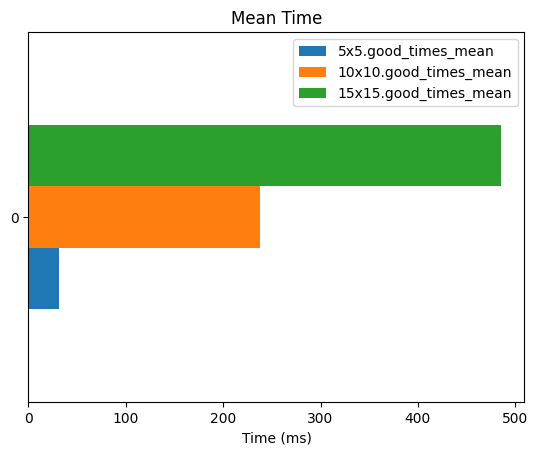

In [10]:
df.plot.barh(y=["5x5.good_times_mean", "10x10.good_times_mean",
             "15x15.good_times_mean"], title="Mean Time", xlabel="Time (ms)")


### Accuracy

Since this is an open problem, that means we have a lot of answers that would have the same time, we cannot objectively say that our algorithm is good.

We can say that it is good to based on our requirements of time (since fitness is based on overall time to finish all of the jobs) but we can use it to compare it to other algorithms, like PSA. Which we will do right now.
